# FERM Project 

Submitted by:
```
Aayushmaan Jain (J022)
Pratyush Patro (J047)
Devanshu Ramaiya (J050)
Ishani Shah (J067)
Amit Prajapati (J075)
```

# Agenda:

This project is divided into two parts: 

1. Portfolio diversification using machine learning and clustering - This part aims to diversify the portfolio by separating it into different clusters on the basis of the average returns and the volatility of the returns of the stocks in it

2. Portfolio allocation using Monte Carlo Simulations - This part of the project aims to determine the optimal allocation of the assets chosen from the portfolio using Monte Carlo Simulation

# Part 1 

## Steps

1. Data collection
The data used in this project was sourced from <a href="https://finance.yahoo.com/">Yahoo Finance</a> and was collected on the Nifty 500 portfolio. For the purpose of this project, we have considered the close column of the financial data 

2. Calculating Returns 
Daily returns were calculated for each stock by using the formula $Returns = \frac{Close_{today}}{Close_{yesterday}} - 1$

3. Summarize each stock 
Since the data was collected for a period of 1 year, for a clustering algorithm to work, we need to summarize each stock. To do that, we have taken the average (average daily return) and the standard deviation (volatility) of each stock over the entire time period 

4. Perform clustering
To perform clustering on the stocks, we have used the K-Means clustering algorithm. 

In [1]:
# If on google colab, uncomment and run this
# ! wget https://raw.githubusercontent.com/aayush1036/FERM-project/master/utils.py
# ! pip install yfinance

In [2]:
from utils import Portfolio

port = Portfolio(stocks_path='nifty_500.csv')

[*********************100%***********************]  500 of 500 completed
Portfolio(stocks_path=d:\FERM\FERM-project\nifty_500.csv, period=1, save=True)


### Step 1 - Collect data, stack column wise and calculate returns

In [3]:
display(port.returns_df.head())

,3MINDIA.NS,AARTIDRUGS.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ABSLAMC.NS,ACC.NS,ADANIENT.NS,...,WHIRLPOOL.NS,WIPRO.NS,WOCKPHARMA.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-26 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-27 00:00:00+05:30,-0.007037,-0.015026,-0.007925,0.018476,0.019921,-0.016949,-0.021710,-0.024797,0.005858,0.014704,...,-0.006904,0.004415,0.001264,-0.029740,-0.044724,0.067838,0.031824,-0.004799,0.000786,-0.017005
2021-10-28 00:00:00+05:30,-0.002130,-0.050341,-0.009275,0.055301,-0.028657,0.001521,0.003731,0.010748,0.017094,-0.107242,...,0.037706,-0.021159,-0.019621,-0.022989,-0.019782,-0.020517,-0.007180,0.005935,-0.034368,-0.023628
2021-10-29 00:00:00+05:30,-0.019560,-0.009892,0.010444,0.068686,0.001611,-0.020760,0.029153,0.030236,0.019909,0.017911,...,-0.034394,-0.015451,-0.000585,0.003922,0.012277,-0.018288,-0.005701,-0.029867,0.022575,-0.027985
2021-11-01 00:00:00+05:30,0.006291,-0.010930,-0.002017,-0.018963,-0.004611,0.028956,0.031179,0.005007,0.017528,0.015243,...,-0.042354,0.013452,0.000820,0.019531,0.033893,0.012022,0.007253,0.008362,-0.002685,-0.008494


### Step 2 - Calculate mean, standard deviation and sharpe ratio for every stock

In [4]:
display(port.summary_df.head())

,Symbol,Returns,Volatility,Sharpe
9,ADANIENT.NS,0.003363,0.024191,0.139025
387,SCHAEFFLER.NS,0.003169,0.023012,0.137693
455,TVSMOTOR.NS,0.002670,0.019535,0.136678
179,HAL.NS,0.002799,0.021545,0.129929
293,MAZDOCK.NS,0.003937,0.030369,0.129635


# K-Means clustering:
K Means clustering works by calculating the Euclidean distance $\sqrt{(y_2 - y_1)^2 + (x_2 - x_1)^2}$. 

Steps used in the algorithm are given below

* K distinct points are taken randomly as the centriod of each cluster
* Euclidean distance of a new point is calculated from the centriod of each cluster 
* The new point is assigned to the cluster whose centriod is closest to it 
* After assigning the point to that cluster, the centriod is re-calculated as the mean of the new point and the existing centriod 
* This process repeats for each data point 


The image below might help to understand the algorithm more clearly

<img src="https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif" height=400 width=400>

##### The stocks are clustered on the basis of Average returns and Volatility because average returns is a good indicator of the behaviour of the returns throught the period and volatility is a good indicator of the fluctuations in the stock over the period

# Evaluating the performance of K-Means clustering 

The performance of the clustering algorithm is determined by using a measure known as Interia. It is calculated by measuring the distance of each point in the cluster from it's centriod and then squaring this distance and summing it up for each cluster. The inertia for the entire dataset is calculated as the sum of inertias for each cluster 

$Inertia = \Sigma(x-\bar{x})^2$

where $x$ is the point and $\bar{x}$ is the centroid

Ideal clusters should have high inter cluster distance and low intra cluster distance, which means that the clusters should be as compact as possible within themselves and as distinct/far as possible from other clusters. 

Hence, for finding the optimal number of clusters, we take  a few initial values to start with and then we chose the value after which there is a significant decrease in the inertia of the clustering set up (elbow point). We do this because continuing to cluster beyond this point would provide insignificant amount of increase in the performance for a comparably high increase in complexity. Any number of cluster below the elbow point will not give a satisfactory performance. 

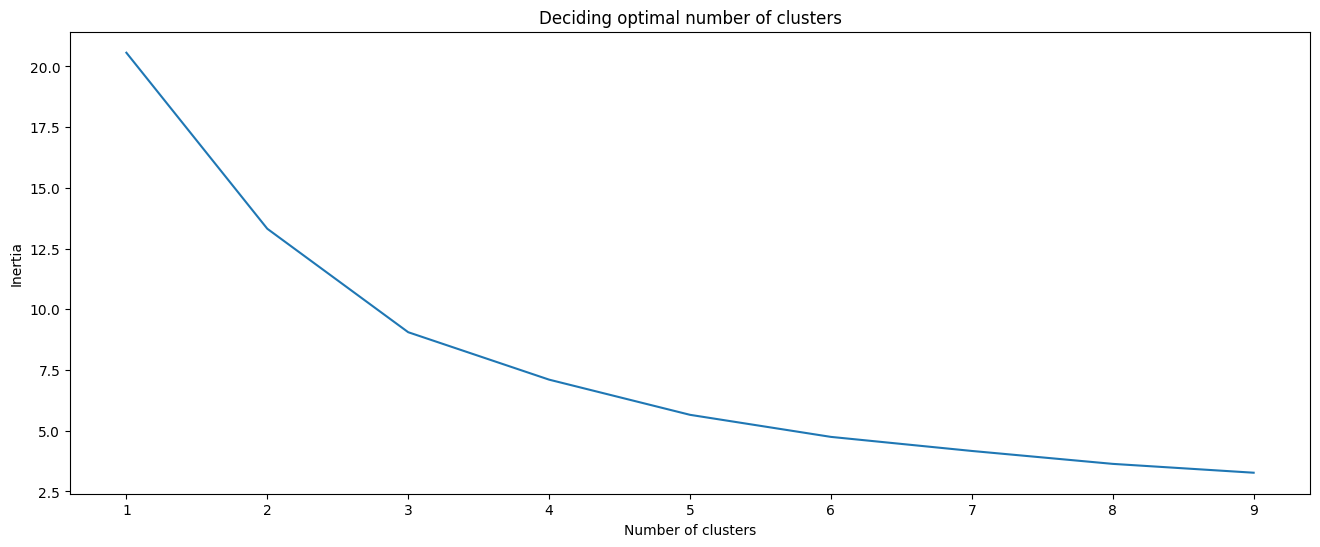

In [5]:
port.find_clusters()

In [6]:
port.cluster(k=3)

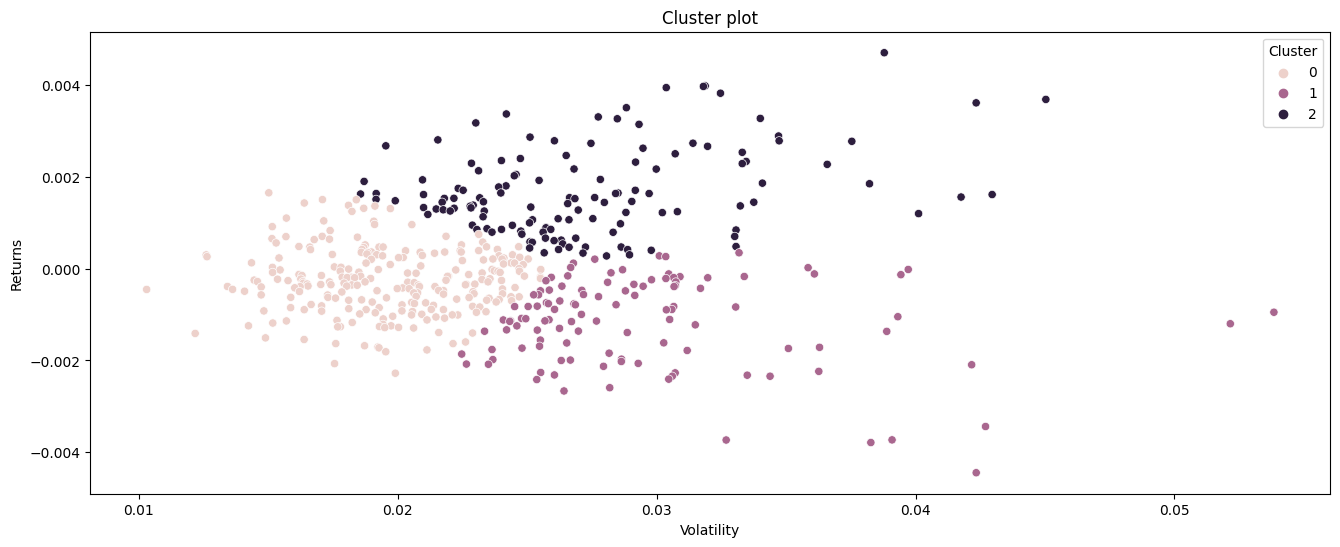

In [7]:
port.visualize_clusters()

In [8]:
cluster_dict = port.infer_clusters()
for name, data in cluster_dict.items():
    print(f'Seeing for cluster -> {name}')
    display(data)

Seeing for cluster -> 2


,Industry
Capital Goods,31
Financial Services,21
Chemicals,14
Automobile and Auto Components,11
Fast Moving Consumer Goods,9


Seeing for cluster -> 0


,Industry
Financial Services,47
Healthcare,35
Fast Moving Consumer Goods,22
Consumer Durables,20
Chemicals,17


Seeing for cluster -> 1


,Industry
Financial Services,16
Healthcare,12
Information Technology,11
Services,8
Textiles,7


# Part 2: 

In this part, we have tried to allocate weights to individual stocks in a portfolio by using Monte Carlo Simulation. In this part, we have also tried to visually determine the best possible allocation by using an Efficient Portfolio Frontier. 

For this part, we have taken the top 20 portfolios based on the Sharpe Ratio ($\frac{r - r_f}{\sigma}$) where $r$ is the return of our poortfolio, $r_f$ is the risk free rate of return (usually the yield of 10 year government security bonds) and $\sigma$ is the volatility of our portfolio. 

These portfolios are then passed through 1000 different simulations and the average returns and volatility is calculated for each simulation and then plotted on the frontier as shown below

# Monte Carlo Simulation 

Monte Carlo simulation is a process where a variable which has uncertainity (weightages of each stock in this case) is assigned random values and the outcomes are calculated for each random value. In this way, we explore almost all possible situations.

The weightages to our stocks were assigned by using a weights matrix which was of the shape of $(n_{stocks}, n_{sim})$ where ${n_{stocks}}$ is the number of stocks we have selected for the simulation and ${n_{sim}}$ is the number of simulations we want to run our stocks through 

The data is present in the shape of $(n_{days}, n_{stocks})$ where $n_{days}$ is the number of trading days and $n_{stocks}$ is the number of stocks in our portfolio

The weights have a constraint in this simulation, the weights have to sum up to 100% and should individually be between 0 and 100%, hence we have used the softmax function to enforce that constraint. Softmax function can be given by the following formula. 

$softmax(x) = \frac{\exp{x_i}}{\Sigma^n_1 \exp{x_i}}$

Finally, to get the results of the simuluation, we have to multiply the data with the weights matrix which gives us the result which has the shape of $(n_{days}, n_{sim})$ where the daily returns of each simulation is stored in the columns. To express it mathematically, we can use the formula 

$$ 
sim = data * weights \\
(n_{days}, n_{sim}) = (n_{days}, n_{stocks}) * (n_{stocks}, n_{sim})
$$

In [9]:
# Perform monte carlo simulation 
monte_carlo_df = port.monte_carlo()
display(monte_carlo_df.head())

,Simulation,Returns,Volatility,Sharpe
0,1,0.003102,0.013386,0.231705
1,2,0.003142,0.013563,0.231625
2,3,0.003023,0.013013,0.232299
3,4,0.003033,0.013400,0.226367
4,5,0.003163,0.013740,0.230210


# Efficient portfolio frontier

Efficient portfolio frontier is a visual tool to understand the relationship between the risk taken and the returns obtained by investing in a certain portfolio. In the frontier, the returns are plotted on the Y-axis and the risk is plotted on the X-axis. This helps us to understand that the ideal portfolio (the one which provides higher returns with a lower risk) should be located in the left hand side of the curve

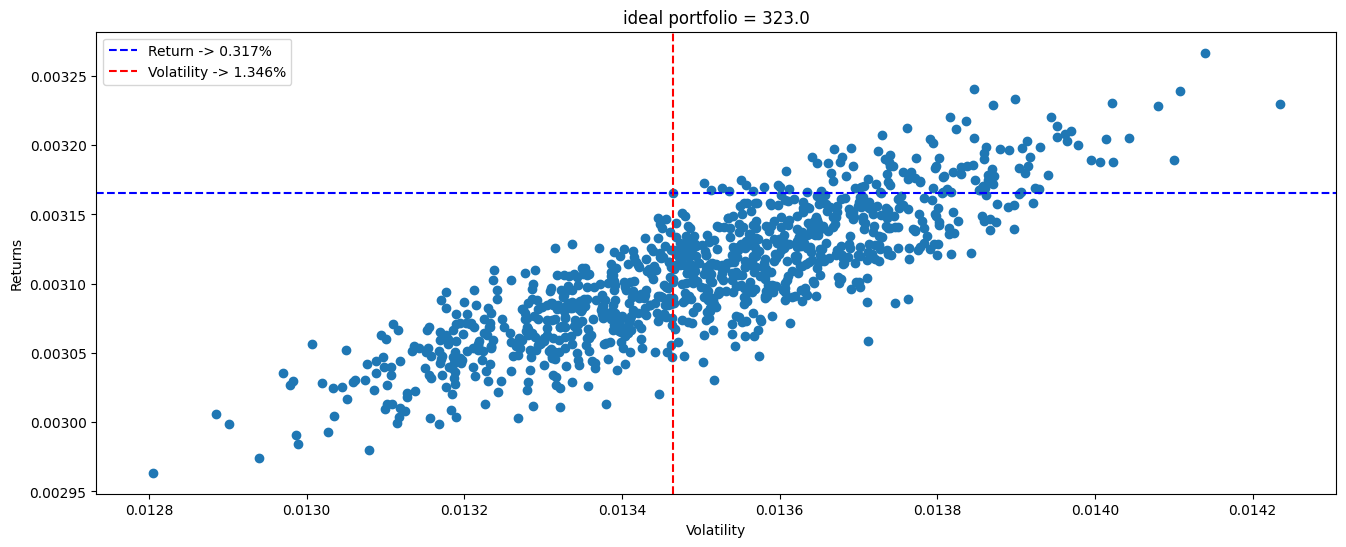

In [10]:
port.see_frontier()